In [1]:
import sklearn
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


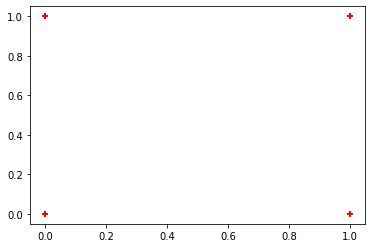

In [3]:
plt.scatter(df.promotion_last_5years, df.left, marker= '+', color= 'red')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df["D"] = pd.factorize(df.Department)[0]
df["s"] = pd.factorize(df.salary)[0]
df.drop("Department", axis=1).copy()
df.drop("salary",axis=1).copy()
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,D,s
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,3.339823,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.820837,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,6.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


In [6]:
from sklearn.model_selection import train_test_split

In [21]:
Xrr = df.drop("left", axis=1)
Xr= Xrr.drop("Department", axis=1).copy()
X= Xr.drop("salary", axis=1).copy()
Y= df["left"]

In [22]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,D,s
0,0.38,0.53,2,157,3,0,0,0,0
1,0.80,0.86,5,262,6,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0
4,0.37,0.52,2,159,3,0,0,0,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [24]:
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,D,s
6723,0.65,0.96,5,226,2,1,0,8,1
6473,0.88,0.80,3,166,2,0,0,6,0
4679,0.69,0.98,3,214,2,0,0,0,0
862,0.41,0.47,2,154,3,0,0,0,0
7286,0.87,0.76,5,254,2,1,0,2,0
...,...,...,...,...,...,...,...,...,...
13388,0.85,0.81,4,260,3,0,0,7,1
10463,0.21,0.43,2,249,3,0,0,8,0
5331,0.78,0.53,3,156,3,0,0,7,0
7499,0.93,0.58,5,238,2,0,0,0,1


In [25]:
from sklearn.linear_model import LogisticRegression

In [30]:
model= LogisticRegression(max_iter= 400)

In [31]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=400)

In [32]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
model.score(X_test, y_test)

0.7862222222222223

In [34]:
model.predict_proba(X_test)

array([[0.97931457, 0.02068543],
       [0.91256796, 0.08743204],
       [0.73682095, 0.26317905],
       ...,
       [0.87271828, 0.12728172],
       [0.9684982 , 0.0315018 ],
       [0.98056559, 0.01943441]])

In [41]:
model.predict([[0.38,0.53,2,157,3,0,0,0,0]])

array([1], dtype=int64)